<a href="https://colab.research.google.com/github/sunandhini96/School_of_AI_Assignment_9/blob/main/sunandini_assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sunandhini96/Main_Models.git

Cloning into 'Main_Models'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 251 (delta 76), reused 135 (delta 73), pack-reused 108
Receiving objects: 100% (251/251), 75.10 KiB | 2.89 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [2]:
cd /content/Main_Models

/content/Main_Models


In [3]:
!ls

main.py  Models  README.md  utils.py


In [4]:
from Models import *

In [5]:
from main import *

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
!pip install torch_lr_finder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from Models.custom_resnet import CustomResNet,ResBlock

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
torch.Size([60, 3, 32, 32])
Files already downloaded and verified


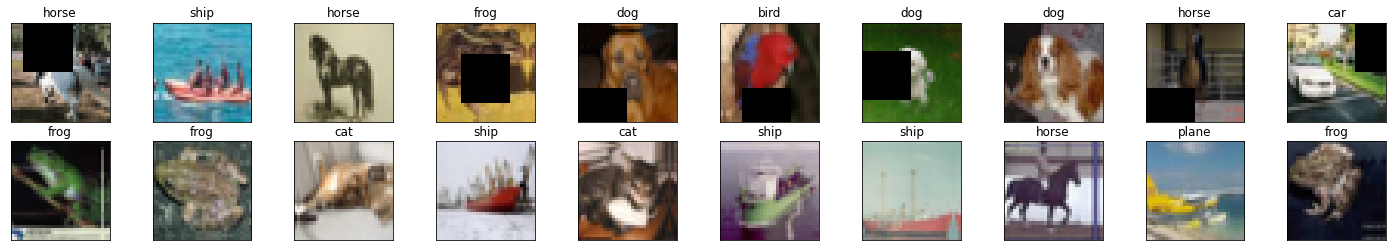

In [8]:
from utils import *

In [10]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 1.9 MB/s eta 0:00:00


In [11]:
from Models.transformer_ultimus import *

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm

In [13]:
# loading the dataset
exp = datasets.CIFAR10('./data', train=True, download=True)
exp_data = exp.data

# Calculate the mean and std for normalization
print('[Train]')
print(' - Numpy Shape:', exp_data.shape)
print(' - min:', np.min(exp_data, axis=(0,1,2)) / 255.)
print(' - max:', np.max(exp_data, axis=(0,1,2)) / 255.)
print(' - mean:', np.mean(exp_data, axis=(0,1,2)) / 255.)
print(' - std:', np.std(exp_data, axis=(0,1,2)) / 255.)
print(' - var:', np.var(exp_data, axis=(0,1,2)) / 255.)

Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - min: [0. 0. 0.]
 - max: [1. 1. 1.]
 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]
 - var: [15.56135559 15.11767693 17.44919073]


In [14]:
exp.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Visualizing the data

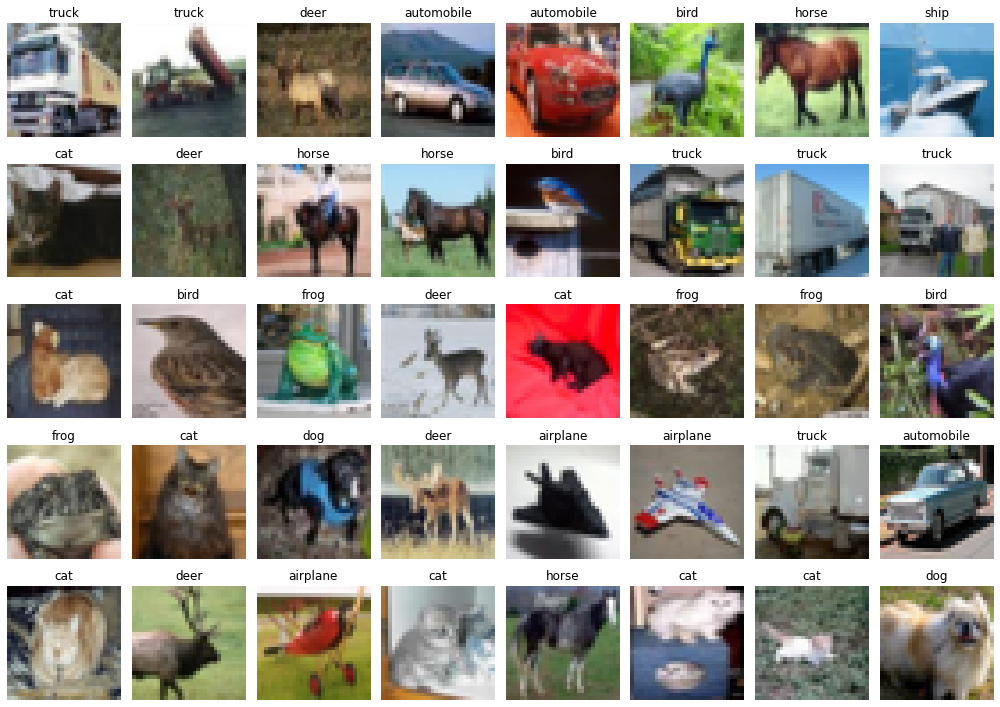

In [15]:
viz_data()


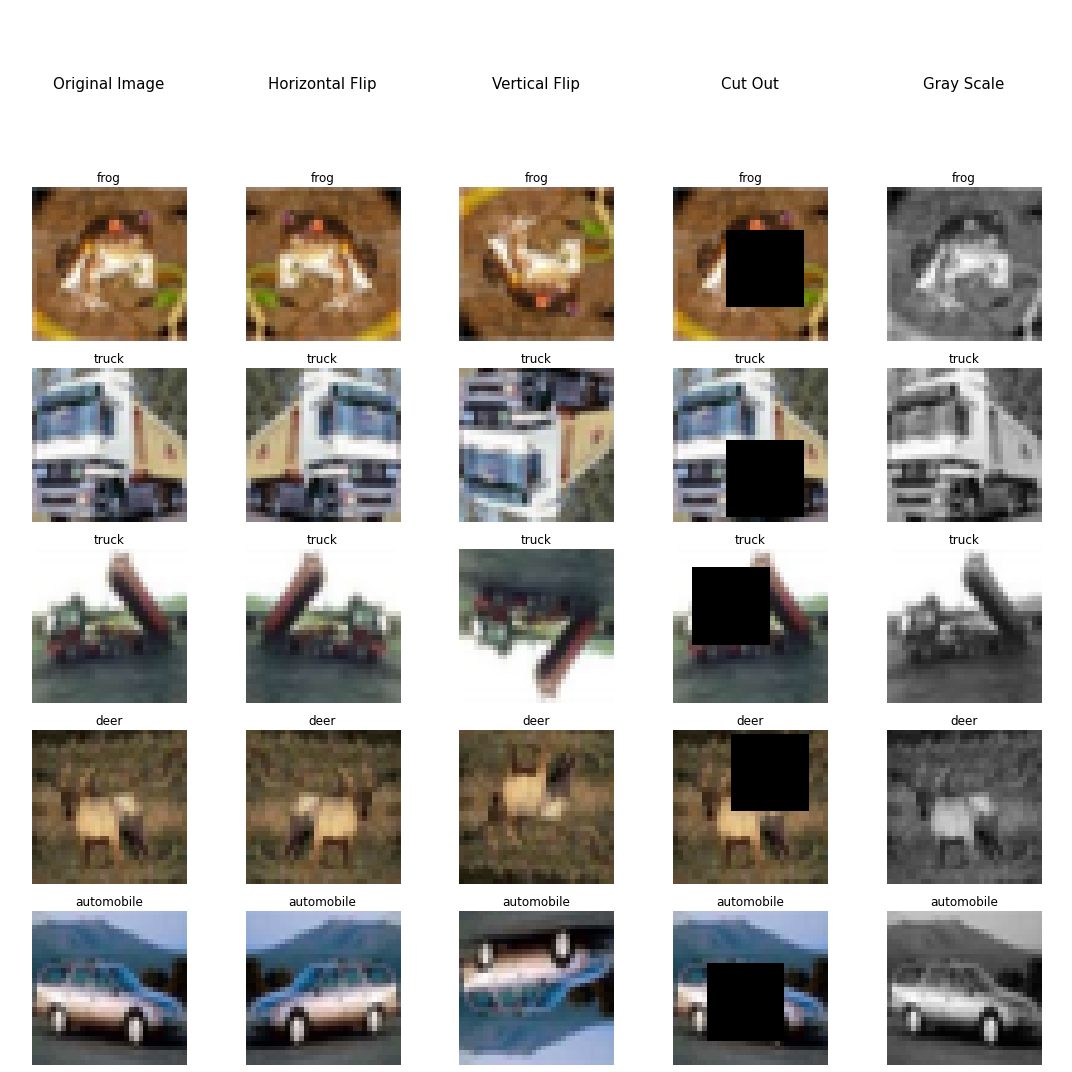

In [16]:
show_images({
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, 
                               min_width=16, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
})

In [17]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=512
else:
    BATCH_SIZE=64

CUDA Available: True


In [18]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


## Summary of the model


In [38]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#UltimusBlock=UltimusBlock()
net1 = TransformerBlock(UltimusBlock).to(device)
summary(net1, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
            Conv2d-2           [-1, 32, 28, 28]           4,640
            Conv2d-3           [-1, 48, 26, 26]          13,872
         AvgPool2d-4             [-1, 48, 1, 1]               0
            Linear-5                    [-1, 8]             384
            Linear-6                    [-1, 8]             384
            Linear-7                    [-1, 8]             384
            Linear-8                   [-1, 48]             432
      UltimusBlock-9                   [-1, 48]               0
           Linear-10                    [-1, 8]             384
           Linear-11                    [-1, 8]             384
           Linear-12                    [-1, 8]             384
           Linear-13                   [-1, 48]             432
     UltimusBlock-14              

## to find optimal LR:

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.05E-03


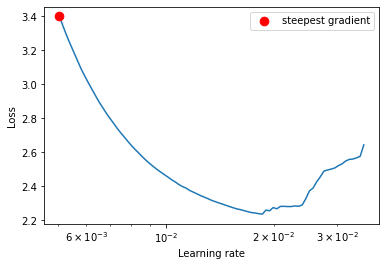

<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>

In [39]:
net4 = TransformerBlock(UltimusBlock).to(device)
import copy
net4_exp = copy.deepcopy(net4)
optimizer = torch.optim.Adam(net4_exp.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net4_exp, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=0.04, num_iter=100)
lr_finder.plot() 

In [40]:
min_loss = min(lr_finder.history['loss'])
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print("Max LR is {}".format(ler_rate))

Max LR is 0.018566355334451112


In [41]:
min_lr=ler_rate/10
print("Min LR is {}".format(min_lr))

Min LR is 0.0018566355334451111


## Training the network : by using One cycle policy

In [42]:
Epochs=24
optimizer = torch.optim.Adam(net4.parameters(), lr=0.004)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=ler_rate,
                                                steps_per_epoch=len(train_loader), 
                                                epochs=Epochs,
                                                pct_start=5/Epochs,
                                                div_factor=1000,
                                                three_phase=False, 
                                                final_div_factor=1000,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,
net, history = fit_model(
    net=net4, device=device,
    criterion = nn.CrossEntropyLoss(),
    train_loader=train_loader, test_loader=test_loader,
    optimizer=optimizer, 
    scheduler=scheduler, 
    NUM_EPOCHS=24
)

EPOCH: 1 (LR: 1.856635533445111e-05)


Batch_id=97 Loss=2.62711 Accuracy=15.57%: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]



Test set: Average loss: 2.0312, Accuracy: 2345/10000 (23.45%)

EPOCH: 2 (LR: 0.003735710158920203)


Batch_id=97 Loss=2.11942 Accuracy=21.48%: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]



Test set: Average loss: 1.9866, Accuracy: 2722/10000 (27.22%)

EPOCH: 3 (LR: 0.007452853962505956)


Batch_id=97 Loss=2.10211 Accuracy=22.70%: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]



Test set: Average loss: 1.9906, Accuracy: 2781/10000 (27.81%)

EPOCH: 4 (LR: 0.011169997766091707)


Batch_id=97 Loss=2.83089 Accuracy=19.05%: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 1.9776, Accuracy: 2613/10000 (26.13%)

EPOCH: 5 (LR: 0.01488714156967746)


Batch_id=97 Loss=2.09412 Accuracy=22.81%: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]



Test set: Average loss: 1.9787, Accuracy: 2952/10000 (29.52%)

EPOCH: 6 (LR: 0.018556384154661588)


Batch_id=97 Loss=2.08744 Accuracy=23.45%: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]



Test set: Average loss: 1.9472, Accuracy: 3056/10000 (30.56%)

EPOCH: 7 (LR: 0.017579208535288125)


Batch_id=97 Loss=2.08331 Accuracy=23.82%: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]



Test set: Average loss: 1.9703, Accuracy: 2791/10000 (27.91%)

EPOCH: 8 (LR: 0.016602032915914663)


Batch_id=97 Loss=2.07809 Accuracy=24.13%: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]



Test set: Average loss: 1.9376, Accuracy: 3034/10000 (30.34%)

EPOCH: 9 (LR: 0.0156248572965412)


Batch_id=97 Loss=2.07603 Accuracy=24.34%: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 1.9427, Accuracy: 2923/10000 (29.23%)

EPOCH: 10 (LR: 0.01464768167716774)


Batch_id=97 Loss=2.07687 Accuracy=24.09%: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]



Test set: Average loss: 1.9355, Accuracy: 3068/10000 (30.68%)

EPOCH: 11 (LR: 0.013670506057794277)


Batch_id=97 Loss=2.06931 Accuracy=24.63%: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]



Test set: Average loss: 1.9549, Accuracy: 2990/10000 (29.90%)

EPOCH: 12 (LR: 0.012693330438420816)


Batch_id=97 Loss=2.07199 Accuracy=24.70%: 100%|██████████| 98/98 [00:19<00:00,  4.90it/s]



Test set: Average loss: 1.9360, Accuracy: 3054/10000 (30.54%)

EPOCH: 13 (LR: 0.011716154819047354)


Batch_id=97 Loss=2.06916 Accuracy=24.65%: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]



Test set: Average loss: 1.9338, Accuracy: 3017/10000 (30.17%)

EPOCH: 14 (LR: 0.010738979199673891)


Batch_id=97 Loss=2.06743 Accuracy=24.82%: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]



Test set: Average loss: 1.9269, Accuracy: 3132/10000 (31.32%)

EPOCH: 15 (LR: 0.009761803580300429)


Batch_id=97 Loss=2.06403 Accuracy=24.97%: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]



Test set: Average loss: 1.9330, Accuracy: 3055/10000 (30.55%)

EPOCH: 16 (LR: 0.008784627960926968)


Batch_id=97 Loss=2.06572 Accuracy=24.94%: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]



Test set: Average loss: 1.9401, Accuracy: 3090/10000 (30.90%)

EPOCH: 17 (LR: 0.007807452341553507)


Batch_id=97 Loss=2.06190 Accuracy=25.27%: 100%|██████████| 98/98 [00:19<00:00,  4.96it/s]



Test set: Average loss: 1.9210, Accuracy: 3113/10000 (31.13%)

EPOCH: 18 (LR: 0.006830276722180043)


Batch_id=97 Loss=2.05988 Accuracy=25.04%: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 1.9154, Accuracy: 3155/10000 (31.55%)

EPOCH: 19 (LR: 0.00585310110280658)


Batch_id=97 Loss=2.05973 Accuracy=25.32%: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]



Test set: Average loss: 1.9240, Accuracy: 3145/10000 (31.45%)

EPOCH: 20 (LR: 0.00487592548343312)


Batch_id=97 Loss=2.06200 Accuracy=25.14%: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]



Test set: Average loss: 1.9125, Accuracy: 3235/10000 (32.35%)

EPOCH: 21 (LR: 0.003898749864059657)


Batch_id=97 Loss=2.06142 Accuracy=25.56%: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]



Test set: Average loss: 1.9146, Accuracy: 3167/10000 (31.67%)

EPOCH: 22 (LR: 0.0029215742446861946)


Batch_id=97 Loss=2.05658 Accuracy=25.35%: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]



Test set: Average loss: 1.9132, Accuracy: 3193/10000 (31.93%)

EPOCH: 23 (LR: 0.0019443986253127321)


Batch_id=97 Loss=2.05563 Accuracy=25.68%: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]



Test set: Average loss: 1.9120, Accuracy: 3220/10000 (32.20%)

EPOCH: 24 (LR: 0.0009672230059392731)


Batch_id=97 Loss=2.04934 Accuracy=25.92%: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]



Test set: Average loss: 1.9082, Accuracy: 3257/10000 (32.57%)



In [43]:
(training_acc, training_loss, testing_acc, testing_loss, lr_trend)=history

In [44]:
print(training_acc)

[15.574, 21.484, 22.698, 19.05, 22.814, 23.446, 23.818, 24.128, 24.344, 24.092, 24.63, 24.702, 24.652, 24.818, 24.972, 24.936, 25.272, 25.04, 25.316, 25.138, 25.56, 25.348, 25.678, 25.924]


Text(0.5, 1.0, 'Test Accuracy')

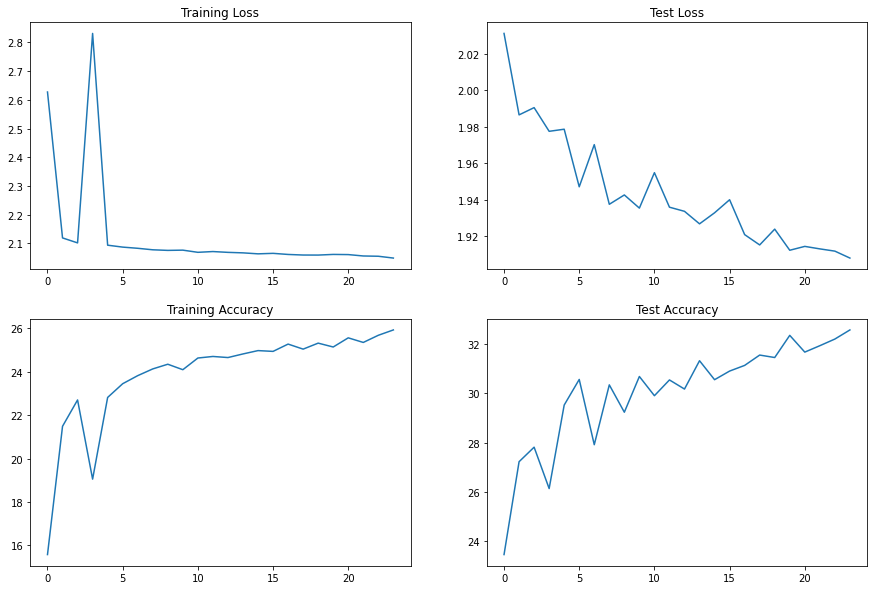

In [45]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
#t=[t.cpu().item() for t in train_losses]
axs[0, 0].plot(training_loss)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(training_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(testing_loss)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(testing_acc)
axs[1, 1].set_title("Test Accuracy")